# Introduction and Overview
__Quantitative Big Imaging__ ETHZ: 227-0966-00L

<p style="font-size:1em;">February 25, 2021</p>
<br /><br />
<p style="font-size:1.5em;padding-bottom: 0.25em;">Anders Kaestner</p>  
<p style="font-size:1em;">Laboratory for Neutron Scattering and Imaging<br />Paul Scherrer Institut</p>


## Todays lecture

- About the course
- Motivating the use of quantitive methods in imaging
- What is an image?
- Where do images come from?
- Science and Reproducibility
- Workflows

### We need some python modules

Python is a modular scripting language with limited functionality. Features are added through modules that are imported.
These are the modules that are needed for this lecture. Please run this cell before you start using the notebook.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.io import imread
from scipy.ndimage import convolve
from skimage.morphology import disk
from skimage.transform import resize
from itertools import product
import os
from io import StringIO


# About the course

- Who are we?
- Who are you?
 - What is expected?
- __Why does this class exist?__
 - Collection
 - Changing computing (Parallel / Cloud)
 - Course outline

## Who are we?
<p style="font-size:1.5em;padding-bottom: 0.25em;">Anders Kaestner, PhD</p>  

__Anders Kaestner__

You will hear me a lot during this course. I am the lecturer and I will also support you with problems during the exercises.

<img src="figures/anders.jpeg" style="height:250px">

- __Beamline scientist__ at the ICON Beamline at the SINQ (Neutron Source) at Paul Scherrer Institute
    - __Lecturer__ at ETH Zurich
- __Algorithm developer__ Varian Medical Systems, Baden-Daettwil
- __Post Doc__ at ETH Zurich, Inst for Terrestial Ecology
- __PhD__ at Chalmers Institute of Technology, Sweden, Signal processing


anders.kaestner@psi.ch

<p style="font-size:1.5em;padding-bottom: 0.25em;">Stefano van Gogh</p> 

__Stefano van Gogh__

Will help you during the exercise sessions. 

 <img src="https://www.psi.ch/sites/default/files/styles/primer_teaser_square_scale/public/2019-06/picture.jpg?itok=t9wRh5Yb" style="height:250px">

- __PhD Student__ in the X-Ray Microscopy Group at ETH Zurich and Swiss Light Source at Paul Scherrer Institute
- Teaching assistant

stefano.van-gogh@psi.ch

## Who are you?

This course is targeting a wide range of students with different levels of experience. In the table you'll see were students came from in previos years. Some have a technical background others are merely producing images in the line of their project and have never seen much more than photoshop and similar programs for processing image data. Using some kind of programming is nescessary to perform quantitative image analysis on large data sets. A single or a few images can easily be handled with interactive software, but taking it beyond that is hard without writing some lines of code. 

Now, some of you have little to no programming experience while others have been programming since they got their first computer in the hand.

|A wide spectrum of backgrounds|  A wide range of skills|
|:---:|:---:|
| Biomedical Engineers | |
| Physicists | I think I've heard of python before|
|Chemists | . |
|Art History Researchers | .|
|Mechanical Engineers | I write template C++ code and hand optimize it afterwards |
| and Computer Scientists|  |

<img src='figures/arrowsign.svg'>

## So how will this ever work?

Now you maybe start to get worried! The purpose of this course is not to teach you programming but rather to provide you with a bag full recipes that you can use in your projects. Most of these recipes are just a list of the commands from different python moduls that you need to perform your analysis. A side-effect will probably be that you learn one or two programming tricks on the way.

In the lectures, there will be small code pieces on the slides. Some of these are there to illustrate how an operation works, while other parts are there for the nice presentation of the results (this is mostly the second half of the code cell). Presenting the results is important. In the end, you want to show your results to the scinetific community. So even though the plotting clutters the slide, there is something to learn there as well. 

__Adaptive assignments__

- Conceptual, graphical assignments with practical examples
  - Emphasis on chosing correct steps and understanding workflow



- Opportunities to create custom implementations, and perform more complicated analysis on larger datasets if interested
  - Emphasis on performance, customizing analysis, and scalability

## Course Expectations

The practical part of the course has two parts. None of these are mandatory, but they will help you to better understand use the material you have learnt in the lectures.

| Exercises |
|:---:|
| Usually 1 set per lecture |
| Optional (but recommended!) |
| Easy - jupyter notebooks are prepared for the exercises |
| Advanced - Writing Python, Java, C++, ... |

The exercises are prepared in a way that you learn step by step what you need to do and guids you through the problems. We will be using jupyter notebooks for the lectures. This is a very common way to work with image data these days.

| Science project |
|:---:|
| Optional (but strongly recommended) |
| Applying Techniques to answer scientific question! |
| Ideally use on a topic relevant for your current project, thesis, or personal activities |
| or choose from one of ours (will be online, soon) |
| Present approach, analysis, and results |
   

In the optional science projects you will have to opportunity to test what you have learned during the course on real problems. This is the place for your creativity. 

## Projects

- A small image processing project
- Can be related to you Master or PhD project
- You will get input and ideas for your own projects
- You will get hands on experience on the techniques you learn here
- Can be used as discussion base for your exam


## Course Overview

|Topic| Date| Title | Description |
|:---:|:---|:---|:---|
| __Introduction__ | 25th February| Introduction and Workflows | Basic overview of the course, introduction to ...|
| __Data__         | 4th March | Image Enhancement |	Overview of what techniques are available for ...|
|                  | 11th March | Ground Truth: Building and Augmenting Datasets | Examples of large datasets, how they were buil... |
|__Segmentation__  | 18th March | Basic Segmentation, Discrete Binary Structures | How to convert images into structures, startin... |	
|                  | 25th March	   | Advanced Segmentation	| More advanced techniques for extracting struct... |
|                  | 1st April      | Supervised Problems and Segmentation	| More advanced techniques for extracting struct...|
|                  | 8th April  | Easter break | Search for eggs|
| __Analysis__     | 15th April	| Analyzing Single Objects, Shape, and Texture |	The analysis and characterization of single st...|
|                  | 22th April	| Analyzing Complex Objects and Distributions	| What techniques are available to analyze more ...|
|                  | 29th April	| Dynamic Experiments	| Performing tracking and registration in dynami...|
|__Big Imaging__   | 6th May	| Imaging with multiple modalities | Combining information from different sources |
|                  | 13th May	| Ascension | Enjoy a lovely early summers day |
|                  | 20th May   | Scaling Up / Big Data	|Performing large scale analyses on clusters |	
|__Wrapping up__   | 27th May   | Project Presentations |	You present your projects|

## Today's  Reading Material

- Some book on image processing with python (to be updated)
- Cloud Computing
 - [The Case for Energy-Proportional Computing](http://www-inst.eecs.berkeley.edu/~cs61c/sp14/) _ Luiz André Barroso, Urs Hölzle, IEEE Computer, December 2007_
 - [Concurrency](http://www.gotw.ca/publications/concurrency-ddj.htm)
- Reproducibility
 - [Trouble at the lab](http://www.economist.com/news/briefing/21588057-scientists-think-science-self-correcting-alarming-degree-it-not-trouble) _Scientists like to think of science as self-correcting. To an alarming degree, it is not_
 - [Why is reproducible research important?](http://simplystatistics.org/2014/06/06/the-real-reason-reproducible-research-is-important/) _The Real Reason Reproducible Research is Important_
 - [Science Code Manifesto](http://software-carpentry.org/blog/2011/10/the-science-code-manifestos-five-cs.html)
 - [Reproducible Research Class](https://www.coursera.org/course/repdata) @ Johns Hopkins University

## Literature / Useful References

These are books that are useful in many of the lectures. In particular the Image processing hand book by John Russ shows you an overview of typical image processing techniques. 


- John C. Russ, “The Image Processing Handbook”,(Boca Raton, CRC Press)
    - Available [online](http://dx.doi.org/10.1201/9780203881095) within domain ethz.ch (or proxy.ethz.ch / public VPN)
- Jean Claude, Morphometry with R
    - [Online](http://link.springer.com/book/10.1007%2F978-0-387-77789-4) through ETHZ


# Motivation - You have data!

## Imaging experiments produce a lot of data

Working with imaging techniques you will get a lot of images that shows the sample in the eye of the technique you are using. The experiment were you acquire these images is only a small fraction of the complete workflow from idea to the final scientific publiction. The amout of data can also be overwhelming for many scientist with the consequence that the data is never analyzed properly, and then also not published in the way it really deserves. 
```{figure} figures/yougotdata.png
---
scale: 80%
---
A typical imaging experiment produces large amounts of data.
```

<img src="figures/yougotdata.png" />

## Motivation - how to proceed?

Now is the question how to proceed towards a working analysis workflow that results in repeatable analyses for your data.
```{figure} figures/crazyworkflow.png
---
scale: 100%
---
A crazy unstructured and unclear work flow to analyze images from your experiment.
```

<img src="figures/crazyworkflow.png">

- To understand what, why and how from the moment an image is produced until it is finished (published, used in a report, …)
- To learn how to go from one analysis on one image to 10, 100, or 1000 images (without working 10, 100, or 1000X harder)

## High acquisition rates

The trend in imaging is that experimentalist want to follow faster and faster processes. This wish can be supported the technical development of new detectors that provide very high acqisition rates. Here, we can also see that some cameras are able to produce more data than is uploaded per day on facebook and instagram!

- Detectors are getting bigger and faster constantly
- Todays detectors are really fast
    - 2560 x 2160 images @ 1500+ times a second = 8GB/s
- Matlab / Avizo / Python / … are saturated after 60 seconds

Many of the analysis platforms are already overwhelmed with handling the data rates produced by typical detector systems at imaging instrument. This restriction is partly due to hardware limitations. The memory is to small, hard drives are not sufficiently fast. The other side of the problem is that these tools are not prepared to work with large data streams.

- A single camera
    - [More information per day than Facebook](http://news.cnet.com/8301-1023_3-57498531-93/facebook-processes-more-than-500-tb-of-data-daily/)
    - [Three times as many images per second as Instagram](http://techcrunch.com/2013/01/17/instagram-reports-90m-monthly-active-users-40m-photos-per-day-and-8500-likes-per-second/)

## Different sources of images

Images are produced by many different detectors and in some cases they are even the output from simulations. In the next sections we see some different imaging modalities and the data rates they produce.

### X-Ray

X-ray imaging at syncrotron light sources produces very high frame rates thanks to the high brilliance of the source. Here are some examples of data rates from some instruments.

 - SRXTM images at (>1000fps) → 8GB/s
 - cSAXS diffraction patterns at 30GB/s
 - Nanoscopium Beamline, 10TB/day, 10-500GB file sizes

### Optical

Optical imaging methods are more modest than the X-ray techniques, but still they produce data in the order of some hundred Mb per second.

 - Light-sheet microscopy (see talk of Jeremy Freeman) produces images → 500MB/s
 - High-speed confocal images at (>200fps) → 78Mb/s

### Personal

Finally, we also take a look at cameras on the consumer market and see that these devices also produce relatively high data rates. This data must mostly be handled by normal household computers, which can be a challenging task...

- GoPro 4 Black - 60MB/s (3840 x 2160 x 30fps) for \$600
- [fps1000](https://www.kickstarter.com/projects/1623255426/fps1000-the-low-cost-high-frame-rate-camera) - 400MB/s (640 x 480 x 840 fps) for $400

## The experiment life cycle

Now we have seen that there is a wish to obtain data at high rates and that there are technological solutions to provide this. The remainging part to develop is the post processing.

1. __Experimental Design__ finding the right technique, picking the right dyes and samples has stayed relatively consistent, better techniques lead to more demanding scientists.

2. __Measurements__ the actual acquisition speed of the data has increased wildly due to better detectors, parallel measurement, and new higher intensity sources

3. __Management__ storing, backing up, setting up databases, these processes have become easier and more automated as data magnitudes have increased

4. __Post Processing__ this portion has is the most time-consuming and difficult and has seen minimal improvements over the last years

----

The post processing is the least trivial part to generalize. The initial steps are often posible to generalize as these are operations that all types of imaging experiments need to go through. When it comes to the experiment specific analysis the degree of generalization decreases and the scientists are left to develop their own procedure to extract the quantitative information from the images.

### How is time used during the experiment life cycle?

With the development of faster acquisision systems there has been a change in the ratio between 
- Exeperiment design and preparation
- Measurements
- Data management
- and post processing

over the years. This in particular the case for X-ray imaging where the flux is high and the acquisition is limited by the detector technology. In other modalities, where the measurement is flux limited we see a different distribution. 

```{figure} figures/qmia-014.png
---
scale: 50%
--- 
The ratio of how much time is spent on different tasks during the lifecycle of an imaging experiment.
```

What also increases the post processing time is that the experiments have become more complicated over the years. Twenty years ago, it was sufficient to show qualitative information a beautify volume rendering or a movie of the sample. Meanwhile, it has become a requirement that you provide quantitative results from the images.

<img src="figures/qmia-014.png" style="height:500px">

## Handling masses of images

### So... how much is a TB, really?

We have been talking about different data amounts of MB, GB, and TB. But, what does that really mean in reality? Let us explore what is a TB.

If __you__ looked at one image with 1000 x 1000 pixels (1 Mpixels)

Here we create one image with 1000x1000 pixels with random values form a uniform distribution [0,1] and show it.

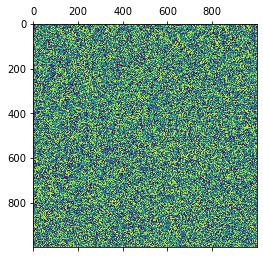

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.matshow(np.random.uniform(size = (1000, 1000)), 
           cmap = 'viridis');

every second, it would take you


In [3]:
# assuming 16 bit images and a 'metric' terabyte
OneTB     = 1e12
ImageSize = 1000*1000*16/8
hour      = 60*60

time_per_tb = OneTB/ImageSize/hour
print("{0:0.1f} hours to view a terabyte".format(time_per_tb))

138.9 hours to view a terabyte


### Overwhelmed scientist

Providing quantitative statements about image data is often very hard. You can may manage to do it on a single images like the bone image below.

```{figure} figures/bone-cells.png
---
---
A slice image show bone cells. 
```

You would like to know:
- Count how many cells are in the bone slice.
        
- Ignore the ones that are ‘too big’ or shaped ‘strangely’.
        
- Are there more on the right side or left side?
        
- Are the ones on the right or left bigger, top or bottom?

<img src="figures/bone-cells.png" style="height:50%"/>

### More overwhelmed scientist

Statistical analysis requires that you study many samples and not just a single one. The samples are also objects which requires 3D data instead of a single 2D slice. 

Many samples are needed:
- Do it all over again for 96 more samples
- This time in 3D with 2000 slices instead of just one!

<img src="figures/96-samples.png" style="height:50%" />

```{figure} figures/96-samples.png
---
scale:75%
---
A collection of 96 volume images from different bone samples.
``` 
Working with multiple 3D images is not feasible anymore to do manually. We need some kind of automated process to perform the analysis.

### Bring on the pain

The 96 samples only represented one of our cases in the study. Now, if we want to study different ages, healthy/diseased, etc, we need to add a sample batch for each case. Maybe we even need to increase the number of samples in each test group. With all these variations, we can easily end up in a thousand samples to analyze.

Great variations in the population   
- Now again with 1090 samples!
- How to measure?
- How to analyze?

<img src="figures/1090-samples.png" style="height:50%"/> 

```{figure} figures/1090-samples.png
---
scale:75%
---
A collection of 1090 bone samples. This is a massive task to analyze!
```
With so many samples we stand in front of a logistic problem to measure the data and once the data is there we have to analyze it. As a first step, we have to specify how to analyze these images to obtain results that may or may not support a hypothesis.

### It gets better

The metrics we specified in the previous example are easy to observe and also to measure. They are direct measurements of pixels and positions. What if we now want to make more complicated inquiries even. Now how do we categorize the images or collections of features using soft metrics?

- Those metrics were quantitative and could be easily visually extracted from the images
- What happens if you have _softer_ metrics
    - How aligned are these cells?
    - Is the group on the left more or less aligned than the right?
    - errr?
  
<img src="figures/alignment-figure.png" />

```{figure} figures/alignment-figure.png
---
scale: 50%
---
Close-up on different bone segments. How aligned are the cells in these images?
```

### Dynamic Information

Many experiments are on top of the spatial dimensions also studies over time. This brings us 4D data sets to analyze. How are we supposed to handle this? Looking at the movie we 

- How many bubbles are here?
- How fast are they moving?
- Do they all move the same speed?
- Do bigger bubbles move faster?
- Do bubbles near the edge move slower?
- Are they rearranging?

<video controls loop src="movies/dk31_foam.mp4" type="video/mp4" height="350px"></video>

# Images 

## An introduction to images


### What is an image?

A very abstract definition: 
- __A pairing between spatial information (position)__
- __and some other kind of information (value).__

In most cases this is a 2- or 3-dimensional position (x,y,z coordinates) and a numeric value (intensity)


### Image sampling
| The world is | The computer needs|
|:---:|:---:|
| Continuous    | Discrete levels |
| No boundaries | Limited extent | 
    

```{figure} figures/grid.pdf
---
scale: 75%

---
The real world is sampled into discrete images with limited extent.
```

<center>
<img src="figures/grid.svg" style="height:400px">
</center>

### What does sampling mean

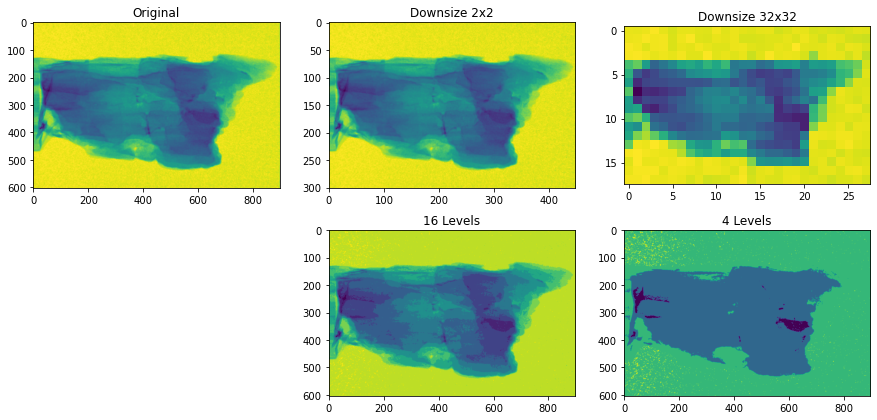

In [4]:
img=np.load('../../common/data/wood.npy');
plt.figure(figsize=[15,7])
plt.subplot(2,3,1); plt.imshow(img); plt.title('Original')
downsize =  2; plt.subplot(2,3,2); plt.imshow(resize(img,(img.shape[0] // downsize, img.shape[1] // downsize), anti_aliasing=False)); plt.title('Downsize {0}x{0}'.format(downsize))
downsize = 32; plt.subplot(2,3,3); plt.imshow(resize(img,(img.shape[0] // downsize, img.shape[1] // downsize),anti_aliasing=False)); plt.title('Downsize {0}x{0}'.format(downsize))
levels   = 16; plt.subplot(2,3,5); plt.imshow(np.floor(img*levels)); plt.title('{0} Levels'.format(levels));
levels   = 4 ; plt.subplot(2,3,6); plt.imshow(np.floor(img*levels)); plt.title('{0} Levels'.format(levels));

## Let's create a small image

In [5]:
basic_image = np.random.choice(range(100), size = (5,5))

xx, yy   = np.meshgrid(range(basic_image.shape[1]), range(basic_image.shape[0]))
image_df = pd.DataFrame(dict(x = xx.ravel(),
                 y = yy.ravel(),
                 Intensity = basic_image.ravel()))
image_df[['x', 'y', 'Intensity']].head(5)

,x,y,Intensity
0,0,0,37
1,1,0,17
2,2,0,49
3,3,0,21
4,4,0,1


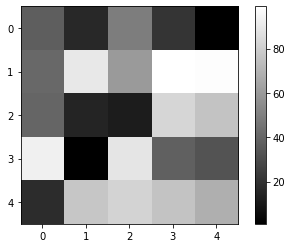

In [6]:
import matplotlib.pyplot as plt
plt.imshow(basic_image, cmap = 'gray')
plt.colorbar(); 


## 2D Intensity Images

The next step is to apply a color map (also called lookup table, LUT) to the image 
- so it is a bit more exciting 
- some features are easier to detect [Rogowitz et al. 1996](https://doi.org/10.1063/1.4822401)



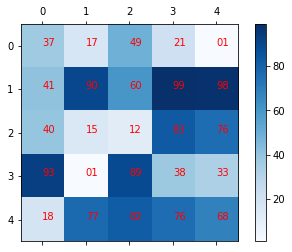

In [7]:
fig, ax1 = plt.subplots(1,1)
plot_image = ax1.matshow(basic_image, cmap = 'Blues')
plt.colorbar(plot_image)

for _, c_row in image_df.iterrows():
    ax1.text(c_row['x'], c_row['y'], s = '%02d' % c_row['Intensity'], fontdict = dict(color = 'r'))

### Different colormaps

Color maps can be arbitrarily defined based on how we would like to visualize the information in the image

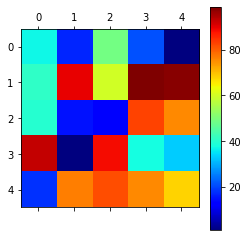

In [8]:
plot_image = plt.matshow(basic_image, cmap = 'jet')
plt.colorbar(plot_image);

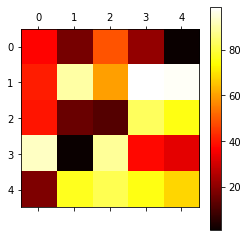

In [9]:
plot_image = plt.matshow(basic_image, cmap = 'hot')
plt.colorbar(plot_image);


### Lookup Tables

Formally a color map is lookup table or a function which
$$ f(\textrm{Intensity}) \rightarrow \textrm{Color} $$

#### Matplotlib's color maps


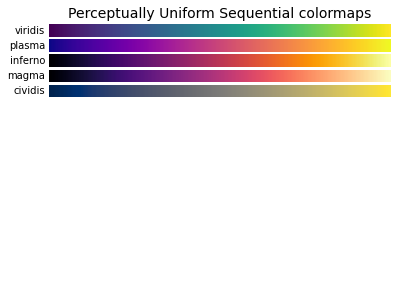

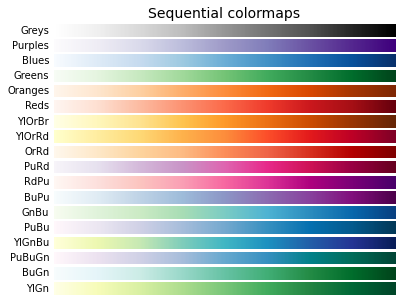

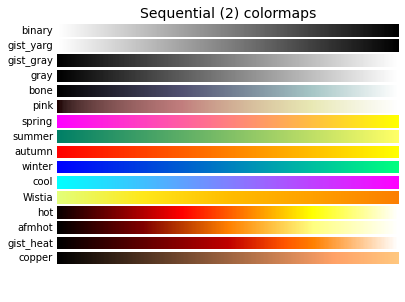

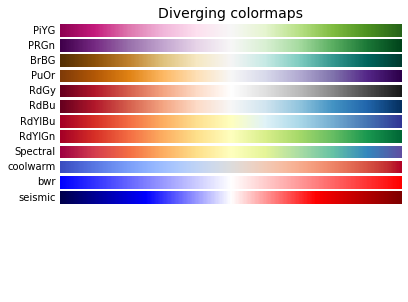

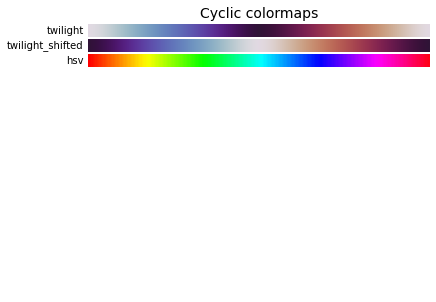

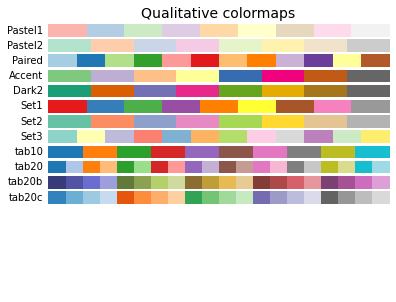

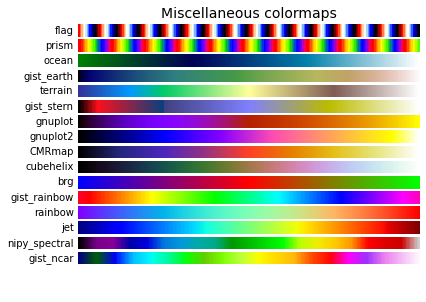

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
#from colorspacious import cspace_converter
from collections import OrderedDict
cmaps = OrderedDict() 
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())


gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)
    

<div class="alert alert-block alert-danger">
<center>Never use rainbox maps like jet, see <a href="https://agilescientific.com/blog/2017/12/14/no-more-rainbows">No more rainbows!</a></center>
</div>

### How are the colors combined

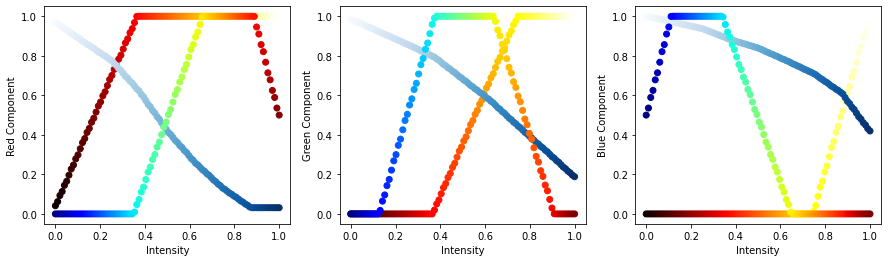

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
xlin = np.linspace(0, 1, 100)
colors = ['Red','Green','Blue']
plt.figure(figsize=[15,4])
for i in np.arange(0,3) :
    plt.subplot(1,3,i+1)

    plt.scatter(xlin, 
            plt.cm.hot(xlin)[:,i],
            c = plt.cm.hot(xlin),label="hot")
    plt.scatter(xlin, 
            plt.cm.Blues(xlin)[:,i], 
            c = plt.cm.Blues(xlin),label="blues")

    plt.scatter(xlin, 
            plt.cm.jet(xlin)[:,i], 
            c = plt.cm.jet(xlin),label='jet')

    plt.xlabel('Intensity');
    plt.ylabel('{0} Component'.format(colors[i]));

### Applied LUTs
These transformations can also be non-linear as is the case of the graph below where the mapping between the intensity and the color is a $\log$ relationship meaning the the difference between the lower values is much clearer than the higher ones

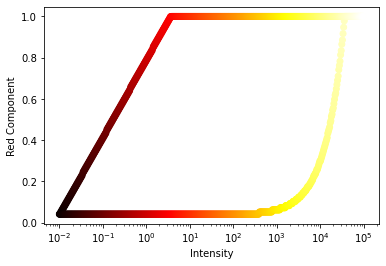

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
xlin = np.logspace(-2, 5, 500)
log_xlin = np.log10(xlin)
norm_xlin = (log_xlin-log_xlin.min())/(log_xlin.max()-log_xlin.min())
fig, ax1 = plt.subplots(1,1)

ax1.scatter(xlin, plt.cm.hot(norm_xlin)[:,0], 
            c = plt.cm.hot(norm_xlin))

ax1.scatter(xlin, plt.cm.hot(xlin/xlin.max())[:,0], 
            c = plt.cm.hot(norm_xlin))
ax1.set_xscale('log');ax1.set_xlabel('Intensity');ax1.set_ylabel('Red Component');

### LUTs on real images

On a real image the difference is even clearer


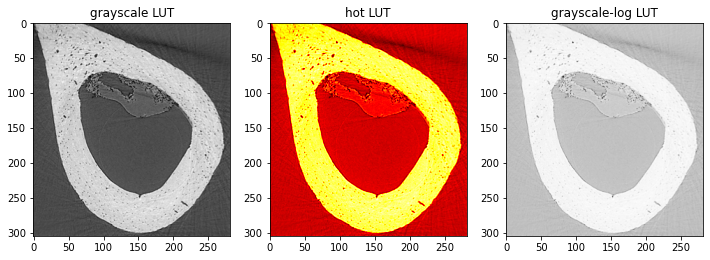

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.io import imread
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12, 4))
in_img = imread('figures/bone-section.png')[:,:,0].astype(np.float32)
ax1.imshow(in_img, cmap = 'gray');
ax1.set_title('grayscale LUT');

ax2.imshow(in_img, cmap = 'hot');
ax2.set_title('hot LUT');

ax3.imshow(np.log2(in_img+1), cmap = 'gray');
ax3.set_title('grayscale-log LUT');

## 3D Images

For a 3D image, the position or spatial component has a 3rd dimension (z if it is a spatial, or t if it is a movie)


<table><tr><td>Volume</td><td>Time series</td></tr>
    <tr>
    <td><img src="figures/cube_10x10x10.svg"></td>
    <td><img src="figures/timeseries_visualization.svg">
</td><tr></table>

```{figure} figures/cube_10x10x10.pdf
---
scale: 75%
---
Three-dimensional data can be a volume in space.
```
```{figure} figures/timeseries_visualization.pdf
---
scale: 75%
---
A movie can also be seen as a three-dimensional image.
```


### A 3D image as array

In [14]:
import numpy as np
vol_image = np.arange(27).reshape((3,3,3))
print(vol_image)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


### Showing 2D slices from volume




This can then be rearranged from a table form into an array form and displayed as a series of slices



[[ 0  1  2  9 10 11]
 [ 3  4  5 12 13 14]
 [ 6  7  8 15 16 17]
 [18 19 20  0  0  0]
 [21 22 23  0  0  0]
 [24 25 26  0  0  0]]


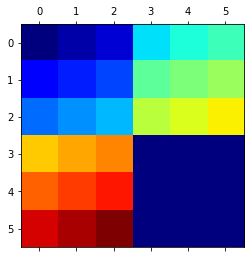

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.util import montage as montage2d
print(montage2d(vol_image, fill = 0))
plt.matshow(montage2d(vol_image, fill = 0), cmap = 'jet');

## Multiple Values per pixel

In the images thus far, we have had one value per position, but there is no reason there cannot be multiple values. In fact this is what color images are (red, green, and blue) values and even 4 channels with transparency (alpha) as a different. For clarity we call the __dimensionality__ of the image the number of dimensions in the spatial position, and the __depth__ the number in the value.

In [16]:
base_df = pd.DataFrame([dict(x = x, y = y) for x,y in product(range(5), range(5))])
base_df['Intensity'] = np.random.uniform(0, 1, 25)
base_df['Transparency'] = np.random.uniform(0, 1, 25)
base_df.head(5)

,x,y,Intensity,Transparency
0,0,0,0.460248,0.813498
1,0,1,0.549794,0.270415
2,0,2,0.167482,0.217956
3,0,3,0.324714,0.479079
4,0,4,0.391312,0.365229



This can then be rearranged from a table form into an array form and displayed as a series of slices


### Display multi-valued pixels separately

The most straight forward way to display multiple pixel values is to display each value separately. This method is, however, mostly not very suitable as the values often are related in some sense. Therefore it is recommended to combine the values in the same plot.

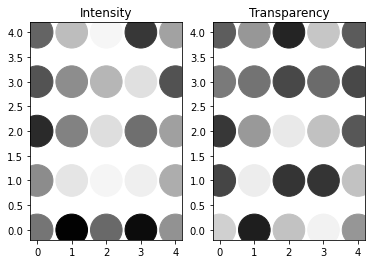

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(base_df['x'], base_df['y'], c = plt.cm.gray(base_df['Intensity']), s = 1000)
ax1.set_title('Intensity')
ax2.scatter(base_df['x'], base_df['y'], c = plt.cm.gray(base_df['Transparency']), s = 1000)
ax2.set_title('Transparency');

In this example we combined two values use one value to control the colormap and the other to control the size of the dots. How you combine the data is related to the to of data you want to combine. If the values are components of a vector it makes more sense to show arrows of different length and direction, etc.

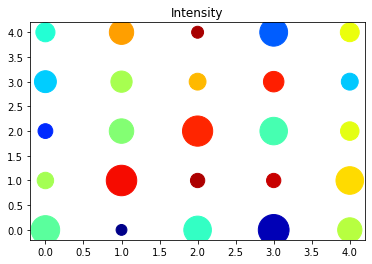

In [18]:
fig, (ax1) = plt.subplots(1, 1)
ax1.scatter(base_df['x'], base_df['y'], c = plt.cm.jet(base_df['Intensity']), s = 1000*base_df['Transparency'])
ax1.set_title('Intensity');

## Hyperspectral Imaging


At each point in the image (black dot), instead of having just a single value, there is an entire spectrum. A selected group of these (red dots) are shown to illustrate the variations inside the sample. While certainly much more complicated, this still constitutes and image and requires the same sort of techniques to process correctly.



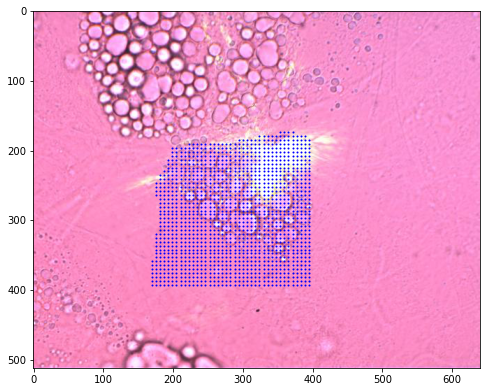

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imread
import os
raw_img = imread('../../common/data/raw.jpg')
im_pos = pd.read_csv('../../common/data/impos.csv', header = None)
im_pos.columns = ['x', 'y']
fig, ax1 = plt.subplots(1,1, figsize = (8, 8));
ax1.imshow(raw_img);
ax1.scatter(im_pos['x'], im_pos['y'], s = 1, c = 'blue');

### Looking at the pixel values

Each pixel of this data set is represented by a full spectrum. This means that we have both wave numbers and intensity values. In many cases, the wavenumbers are the same for all pixels, which makes it possible to reduce the redundancy of the wave number vector using a single 1D array to represent this information.

In [20]:
full_df = pd.read_csv('../../common/data/full_img.csv').query('wavenum<1200')
print(full_df.shape[0], 'rows')
full_df.head(5)

210750 rows


,x,y,wavenum,val
0,168.95,358.8,750,527.571102
1,168.95,358.8,753,459.778584
2,168.95,358.8,756,406.337255
3,168.95,358.8,759,341.858123
4,168.95,358.8,762,246.645673


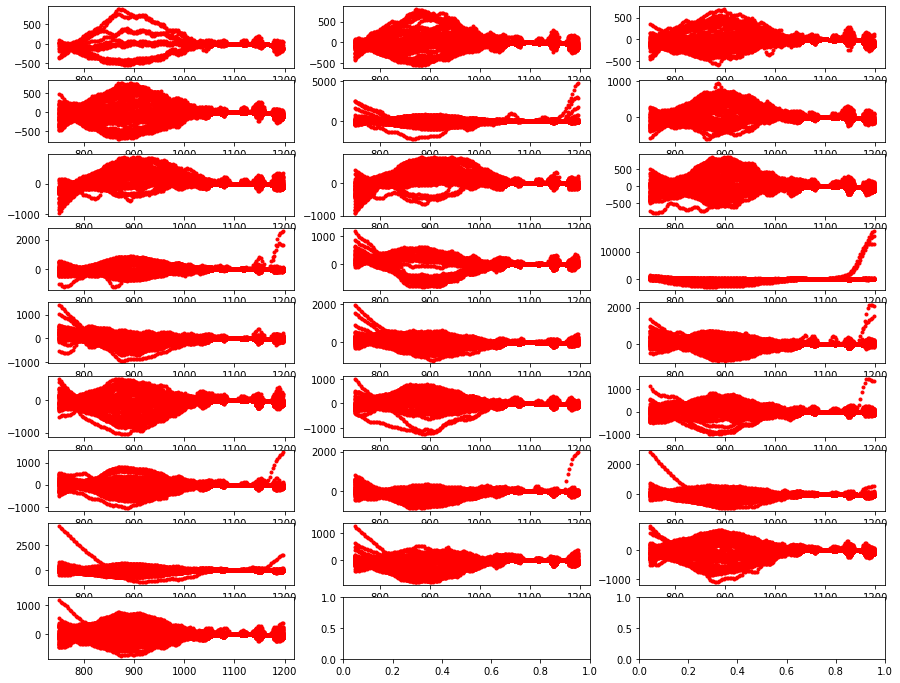

In [21]:
full_df['g_x'] = pd.cut(full_df['x'], 5)
full_df['g_y'] = pd.cut(full_df['y'], 5)
fig, m_axs = plt.subplots(9, 3, figsize = (15, 12)); m_axs=m_axs.ravel()
for ((g_x, g_y), c_rows), c_ax in zip(full_df.sort_values(['x','y']).groupby(['g_x', 'g_y']),m_axs):
    c_ax.plot(c_rows['wavenum'], c_rows['val'], 'r.')

## Image Formation

The image formation process is the process to use some kind of excitation or impulse probe a sample. This requires the interaction of four parts.
 ```{figure} figures/image-formation.pdf
 ---
 ---
 The parts involved in the image formation process probing a sample.
 ```

<img src="figures/image-formation.svg" />

- __Impulses__ Light, X-Rays, Electrons, A sharp point, Magnetic field, Sound wave
- __Characteristics__ Electron Shell Levels, Electron Density, Phonons energy levels, Electronic, Spins, Molecular mobility
- __Response__ Absorption, Reflection, Phase Shift, Scattering, Emission
- __Detection__ Your eye, Light sensitive film, CCD / CMOS, Scintillator, Transducer

### Where do images come from?



| Modality | Impulse | Characteristic | Response | Detection |
|:---:|:---:|:---:|:---:|:---:|
| Light Microscopy| White Light | Electronic interactions | Absorption |Film, Camera |
| Phase Contrast | Coherent light | Electron Density (Index of Refraction) | Phase Shift | Phase stepping, holography, Zernike |
| Confocal Microscopy |Laser Light | Electronic Transition in Fluorescence Molecule | Absorption and reemission |Pinhole in focal plane, scanning detection |
| X-Ray Radiography | X-Ray light | Photo effect and Compton scattering | Absorption and scattering | Scintillator, microscope, camera |
| Neutron Radiography | Neutrons | Interaction with nucleus |Scattering and absorption| Scintillator, optics, camera |
| Ultrasound |High frequency sound waves | Molecular mobility | Reflection and Scattering | Transducer |
| MRI | Radio-frequency EM | Unmatched Hydrogen spins | Absorption and reemission | RF coils to detect |
| Atomic Force Microscopy | Sharp Point | Surface Contact | Contact, Repulsion | Deflection of a tiny mirror|


## Acquiring Images

### Traditional / Direct imaging
- Visible images produced or can be easily made visible
- Optical imaging, microscopy


/Users/kaestner/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


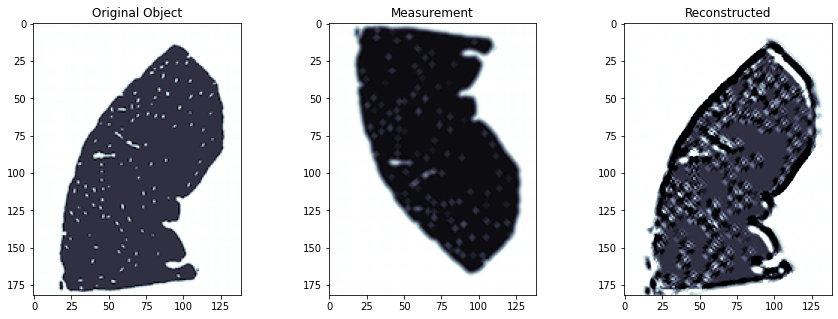

In [22]:
bone_img  = imread('figures/tiny-bone.png').astype(np.float32)
# simulate measured image
conv_kern = np.pad(disk(2), 1, 'constant', constant_values = 0)
meas_img  = convolve(bone_img[::-1], conv_kern)
# run deconvolution
dekern    = np.fft.ifft2(1/np.fft.fft2(conv_kern))
rec_img   = convolve(meas_img, dekern)[::-1]
# show result
fig, (ax_orig, ax1, ax2) = plt.subplots(1,3, figsize = (15, 5))
ax_orig.imshow(bone_img, cmap = 'bone'); ax_orig.set_title('Original Object')

ax1.imshow(np.real(meas_img), cmap = 'bone'); ax1.set_title('Measurement')

ax2.imshow(np.real(rec_img), cmap = 'bone', vmin = 0, vmax = 255); ax2.set_title('Reconstructed');


### Indirect / Computational imaging
- Recorded information does not resemble object
- Response must be transformed (usually computationally) to produce an image



1.146423838816545 6.61125552595089 3.3563935033662253


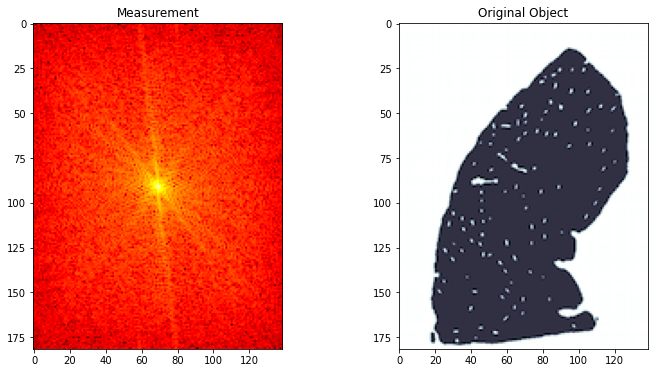

In [23]:
bone_img = imread('figures/tiny-bone.png').astype(np.float32)
# simulate measured image
meas_img = np.log10(np.abs(np.fft.fftshift(np.fft.fft2(bone_img))))
print(meas_img.min(), meas_img.max(), meas_img.mean())
fig, (ax1, ax_orig) = plt.subplots(1,2, 
                               figsize = (12, 6))
ax_orig.imshow(bone_img, cmap = 'bone')
ax_orig.set_title('Original Object')

ax1.imshow(meas_img, cmap = 'hot')
ax1.set_title('Measurement');


### Traditional Imaging


<img src="figures/traditional-imaging.png" style="height:500px"/>


<small>
Copyright 2003-2013 J. Konrad in EC520 lecture, reused with permission
</small>

## Traditional Imaging: Model


![Traditional Imaging Model](figures/traditional-image-flow.png)

$$
\left[\left([b(x,y)*s_{ab}(x,y)]\otimes h_{fs}(x,y)\right)*h_{op}(x,y)\right]*h_{det}(x,y)+d_{dark}(x,y)
$$

$s_{ab}$ is the only information you are really interested in, so it is important to remove or correct for the other components

For color (non-monochromatic) images the problem becomes even more complicated
$$
\int_{0}^{\infty} {\left[\left([b(x,y,\lambda)*s_{ab}(x,y,\lambda)]\otimes h_{fs}(x,y,\lambda)\right)*h_{op}(x,y,\lambda)\right]*h_{det}(x,y,\lambda)}\mathrm{d}\lambda+d_{dark}(x,y)
$$

### Indirect Imaging (Computational Imaging)

With indirect imaging you make acquisitions in a form that don't represent the information you want to have. It is needed to perform a numeric transformation to obtain images in observation space.

Some examples are:
- Tomography through projections
- Microlenses [Light-field photography](https://en.wikipedia.org/wiki/Light-field_camera)
- Diffraction patterns
- Hyperspectral imaging with Raman, IR, CARS
- Surface Topography with cantilevers (AFM)


<table>
<tr><td>
    
- Tomography through projections
- Microlenses [Light-field photography](https://en.wikipedia.org/wiki/Light-field_camera)

</td>
<td>
    
- Diffraction patterns
- Hyperspectral imaging with Raman, IR, CARS
- Surface Topography with cantilevers (AFM)

</td>
</tr>
<tr>
<td><video controls loop src="movies/lightfield.mp4" height="300px" type="video/mp4"></video></td>
<td><img src="figures/surface-plot.png" style="height:300px"/></td>
</tr></table>

# Different views on image Analysis

Image analysis is a complex task and there are many ways to reach the quantitative results from the images. 
```{figures} figures/approaches.png
---
scale: 75%
---
Your background often decides how you approach an image analysis problem.
```
We can make two initial statements:

<center><img src="figures/approaches.png" style="height:400px"></center>

- An image is a bucket of pixels.
- How you choose to turn it into useful information is strongly dependent on your background

## Image Analysis: Experimentalist

The experimentalist looks with a problem driven concept on the analysis task. It is often a top down approach aiming at solving the specific problem at hand. The solution is often reality driven and aims at finding models explaining the information presented in the images.

Typical task the experimentalist tries to solve are very practical and specific like counting cells in the image or to measure the porosity of the sample.

<table>
    <tr><td align="left"> 
    
### Characteristics
-  Problem-driven 
- Top-down 
- _Reality_ Model-based 

### Examples
- cell counting
- porosity
</td>
<td><img src="figures/approaches.png" style="height:400px;"> </td>
</tr></table>

## Image Analysis: Computer Vision Approaches

The computer vision/signal processing scientist works to develop methods to solve a class of image processing problem. The approach is based on abstract features found in the image. The models are based on features and noise found in the images. The systematic appoach is even based on engineered image features to better test and evaluate the developed methods.

The computer vision approach is typical looking to detect features like edges, structures, and also complicated features like faces. 

<table>
    <tr><td align="left"> 

### Characteristics
- Method-driven
 - Feature-based
 - _Image_ Model-based
- Engineer features for solving problems

### Examples

- Edge detection
- Face detection
</td>
<td>
<td><img src="figures/approaches.png" style="height:400px;"> </td>
</td>
</tr></table>

## Image Analysis: Deep Learning Approach

Finally, the deep learning approach is data driven and inspired by the way nature solves the image analysis problem. This approach rebuilds the way image processing is done from scratch, but at the same time it also based on concepts developed in computer vision. The deep learning approaches doesn't require a specific model describing the images it is meant to analyze, but rather make conclusions based on the previous images it has been exposed to. 

The deep learning appraoch is good handling rare events in the data and when it trained correctly it is also capable of generalizing to detect new features. This may sound like magic, but this is also a well founded and structured approach to analyzing images. Care most however be taken not to over fit or to genralize to much. The models are never better than the data they have been exposed to.

Examples where deep learing is frequently used are to detect annomalies in the data or to label images based on their contents.

<table>
    <tr>
        <td>
            
### Characteristics
- Results-driven
- Biology ‘inspired’
- Build both image processing and analysis from scratch

### Examples

- Captioning images
- Identifying unusual events
</td>
<td><img src="figures/approaches.png" style="height:400px;"> </td>
</tr></table>

## Summary analysis approaches

These three approaches have their own advantages and disadvantages, therefore it is good to know them all to be able to select the adquate method for the task you have to solve. It is not unusual that you will have to use a mix of the approaches. It is important to be open minded and think outside the box. In the end, what matters is that you can provide a reliable analysis of your data.

# On Science

## What is the purpose?


- Discover and validate new knowledge

### How?
- Use the scientific method as an approach to convince other people
- Build on the results of others so we don't start from the beginning

### Important Points
- While __qualitative__ assessment is important, it is difficult to reliably produce and scale
- __Quantitative__ analysis is far from perfect, but provides metrics which can be compared and regenerated by anyone

<small>Inspired by: [imagej-pres](http://www.slideshare.net/CurtisRueden/imagej-and-the-scijava-software-stack)</small>

## Science and Imaging
Images are great for qualitative analyses since our brains can quickly interpret them without large _programming_ investements.
### Proper processing and quantitative analysis is however much more difficult with images.
 - If you measure a temperature, quantitative analysis is easy, $50K$.
 - If you measure an image it is much more difficult and much more prone to mistakes, subtle setup variations, and confusing analyses


### Furthermore in image processing there is a plethora of tools available

- Thousands of algorithms available
- Thousands of tools
- Many images require multi-step processing
- Experimenting is time-consuming

## Why quantitative?

### Human eyes have issues

Which center square seems brighter?

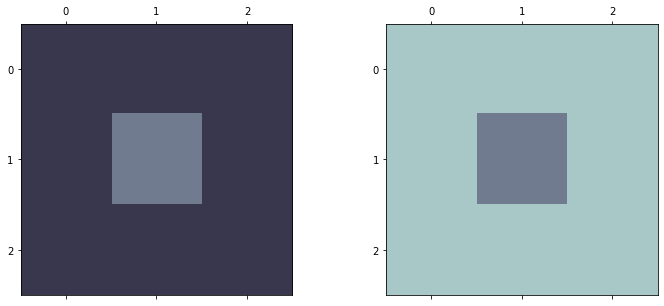

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
xlin = np.linspace(-1,1, 3)
xx, yy = np.meshgrid(xlin, xlin)
img_a = 25*np.ones((3,3))
img_b = np.ones((3,3))*75
img_a[1,1] = 50
img_b[1,1] = 50
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 5));
ax1.matshow(img_a, vmin = 0, vmax = 100, cmap = 'bone');
ax2.matshow(img_b, vmin = 0, vmax = 100, cmap = 'bone');


## Intensity gradients
Are the intensities constant in the image?



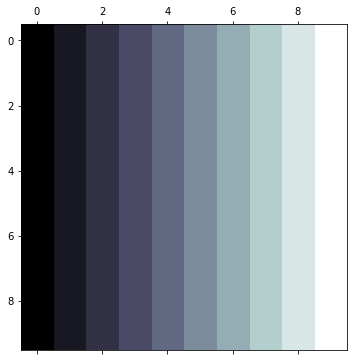

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
xlin = np.linspace(-1,1, 10)
xx, yy = np.meshgrid(xlin, xlin)

fig, ax1 = plt.subplots(1,1, figsize = (6, 6))
ax1.matshow(xx, vmin = -1, vmax = 1, cmap = 'bone')

## Reproducibility vs. Repeatability

### Reproducibility

```{figure} figures/reproducibility.pdf
---
scale: 75%
---
A workflow describing the concept of reproducibility.
```

<img src='figures/reproducibility.svg' style='height:300px'>

### Repeatability

```{figure} figures/repeatability.pdf
---
scale: 75%
---
A workflow describing the concept of reproducibility.
```

<img src='figures/repeatability.svg' style='height:300px'>

## Reproducibility vs. Repeatability

Science demands __repeatability__! and really wants __reproducability__
- Experimental conditions can change rapidly and are difficult to make consistent
- Animal and human studies are prohibitively time consuming and expensive to reproduce
- Terabyte datasets cannot be easily passed around many different groups
- Privacy concerns can also limit sharing and access to data

----

- _Science_ is already difficult enough
- Image processing makes it even more complicated
- Many image processing tasks are multistep, have many parameters, use a variety of tools, and consume a very long time

## How can we keep track of everything for ourselves and others?
- We can make the data analysis easy to repeat by an independent 3rd party
- Document the analysis steps
- Write clear and understandable code

# Workflows for image analysis

# Computing has changed: Parallel


## Moores Law
$$ \textrm{Transistors} \propto 2^{T/(\textrm{18 months})} $$

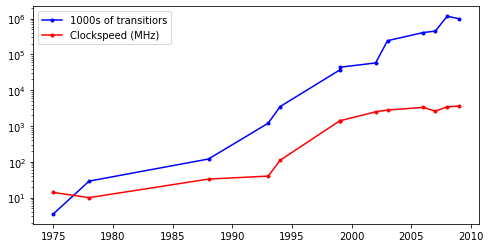

In [26]:
# stolen from https://gist.github.com/humberto-ortiz/de4b3a621602b78bf90d
moores_txt=["Id Name  Year  Count(1000s)  Clock(MHz)\n",
        "0            MOS65XX  1975           3.51           14\n",
        "1          Intel8086  1978          29.00           10\n",
        "2          MIPSR3000  1988         120.00           33\n",
        "3           AMDAm486  1993        1200.00           40\n",
        "4        NexGenNx586  1994        3500.00          111\n",
        "5          AMDAthlon  1999       37000.00         1400\n",
        "6   IntelPentiumIII  1999       44000.00         1400\n",
        "7         PowerPC970  2002       58000.00         2500\n",
        "8       AMDAthlon64  2003      243000.00         2800\n",
        "9    IntelCore2Duo  2006      410000.00         3330\n",
        "10         AMDPhenom  2007      450000.00         2600\n",
        "11      IntelCorei7  2008     1170000.00         3460\n",
        "12      IntelCorei5  2009      995000.00         3600"]

sio_table = StringIO(''.join(moores_txt)); moore_df = pd.read_table(sio_table, sep = '\s+', index_col = 0);
fig, ax1 = plt.subplots(1,1, figsize = (8, 4)); ax1.semilogy(moore_df['Year'], moore_df['Count(1000s)'], 'b.-', label = '1000s of transitiors'); ax1.semilogy(moore_df['Year'], moore_df['Clock(MHz)'], 'r.-', label = 'Clockspeed (MHz)') ;ax1.legend(loc = 2);

<small>_Based on data from https://gist.github.com/humberto-ortiz/de4b3a621602b78bf90d_</small>

----

There are now many more transistors inside a single computer but the processing speed hasn't increased. How can this be?

- Multiple Core
 - Many machines have multiple cores for each processor which can perform tasks independently
- Multiple CPUs
 - More than one chip is commonly present
- New modalities
  - GPUs provide many cores which operate at slow speed

### $\rightarrow$ Parallel Code is important

## Computing has changed: Cloud

- Computer, servers, workstations are _wildly underused_ (majority are <50%)
- Buying a big computer that sits _idle most of the time_ is a waste of money
    - http://www-inst.eecs.berkeley.edu/~cs61c/sp14/
    - “The Case for Energy-Proportional Computing,” Luiz André Barroso, Urs Hölzle, IEEE Computer, December 2007
- Traditionally the most important performance criteria was time, how fast can it be done
- With Platform as a service servers can be _rented instead of bought_
- Speed is still important but using cloud computing $ / Sample is the real metric
- In Switzerland a PhD student is 400x as expensive per hour as an Amazon EC2 Machine
- Many competitors keep prices low and offer flexibility


<img src="figures/cloud-services.png" style="height:600">


## Soup/Recipe Example

### Simple Soup
Easy to follow the list, anyone with the right steps can execute and repeat (if not reproduce) the soup

1. Buy {carrots, peas, tomatoes} at market
1. _then_ Buy meat at butcher
1. _then_ Chop carrots into pieces
1. _then_ Chop potatos into pieces
1. _then_ Heat water
1. _then_ Wait until boiling then add chopped vegetables
1. _then_ Wait 5 minutes and add meat

### More complicated soup
Here it is harder to follow and you need to carefully keep track of what is being performed

#### Steps 1-4
4. _then_ Mix carrots with potatos $\rightarrow  mix_1$
4. _then_ add egg to $mix_1$ and fry for 20 minutes
4. _then_ Tenderize meat for 20 minutes
4. _then_ add tomatoes to meat and cook for 10 minutes $\rightarrow mix_2$
5. _then_ Wait until boiling then add $mix_1$
6. _then_ Wait 5 minutes and add $mix_2$

## Using flow charts / workflows

### Simple Soup

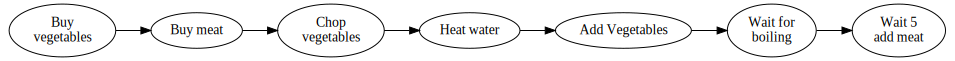

In [27]:
from IPython.display import SVG
import pydot
graph = pydot.Dot(graph_type='digraph', rankdir="LR")
node_names = ["Buy\nvegetables","Buy meat","Chop\nvegetables","Heat water", "Add Vegetables",
              "Wait for\nboiling","Wait 5\nadd meat"]
nodes = [pydot.Node(name = '%04d' % i, label = c_n) 
         for i, c_n in enumerate(node_names)]
for c_n in nodes:
    graph.add_node(c_n)
    
for (c_n, d_n) in zip(nodes, nodes[1:]):
    graph.add_edge(pydot.Edge(c_n, d_n))

SVG(graph.create_svg())


### Workflows

Clearly a linear set of instructions is ill-suited for even a fairly easy soup, it is then even more difficult when there are dozens of steps and different pathsways


----

Furthermore a clean workflow allows you to better parallelize the task since it is clear which tasks can be performed independently



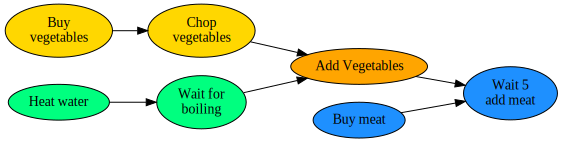

In [28]:
from IPython.display import SVG
import pydot
graph = pydot.Dot(graph_type='digraph', rankdir="LR")
node_names = ["Buy\nvegetables","Buy meat","Chop\nvegetables","Heat water", "Add Vegetables",
              "Wait for\nboiling","Wait 5\nadd meat"]
nodes = [pydot.Node(name = '%04d' % i, label = c_n, style = 'filled') 
         for i, c_n in enumerate(node_names)]
for c_n in nodes:
    graph.add_node(c_n)
    
def e(i,j, col = None):
    if col is not None:
        for c in [i,j]:
            if nodes[c].get_fillcolor() is None: 
                nodes[c].set_fillcolor(col)
    graph.add_edge(pydot.Edge(nodes[i], nodes[j]))

e(0, 2, 'gold'); e(2, 4); e(3, -2, 'springgreen'); e(-2, 4, 'orange'); e(4, -1) ; e(1, -1, 'dodgerblue')

SVG(graph.create_svg())


## Directed Acyclical Graphs (DAG)
We can represent almost any computation without loops as DAG. What this allows us to do is now break down a computation into pieces which can be carried out independently. There are a number of tools which let us handle this issue.

- PyData Dask - https://dask.pydata.org/en/latest/
- Apache Spark - https://spark.apache.org/
- Spotify Luigi - https://github.com/spotify/luigi
- Airflow - https://airflow.apache.org/
- KNIME - https://www.knime.com/
- Google Tensorflow - https://www.tensorflow.org/
- Pytorch / Torch - http://pytorch.org/

### Concrete example
What is a DAG good for?

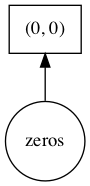

In [29]:
import dask.array as da

from dask.dot import dot_graph
image_1 = da.zeros((5,5), chunks = (5,5))
image_2 = da.ones((5,5), chunks = (5,5))
dot_graph(image_1.dask)

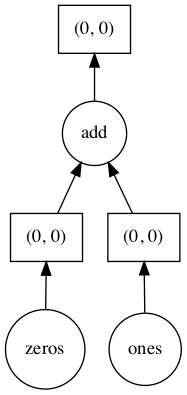

In [30]:
image_3 = image_1 + image_2
dot_graph(image_3.dask)

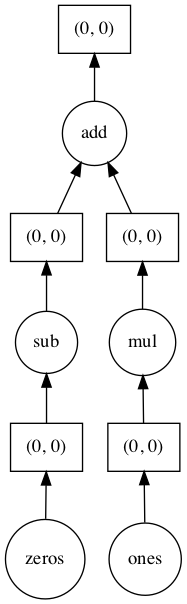

In [31]:
image_4 = (image_1-10) + (image_2*50)
dot_graph(image_4.dask)

# Let's go big
Now let's see where this can be really useful

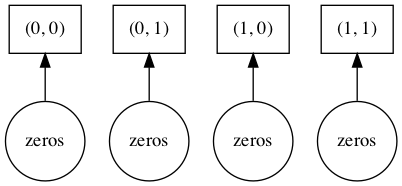

In [32]:
import dask.array as da
from dask.dot import dot_graph
image_1 = da.zeros((1024, 1024), chunks = (512, 512))
image_2 = da.ones((1024 ,1024), chunks = (512, 512))
dot_graph(image_1.dask)

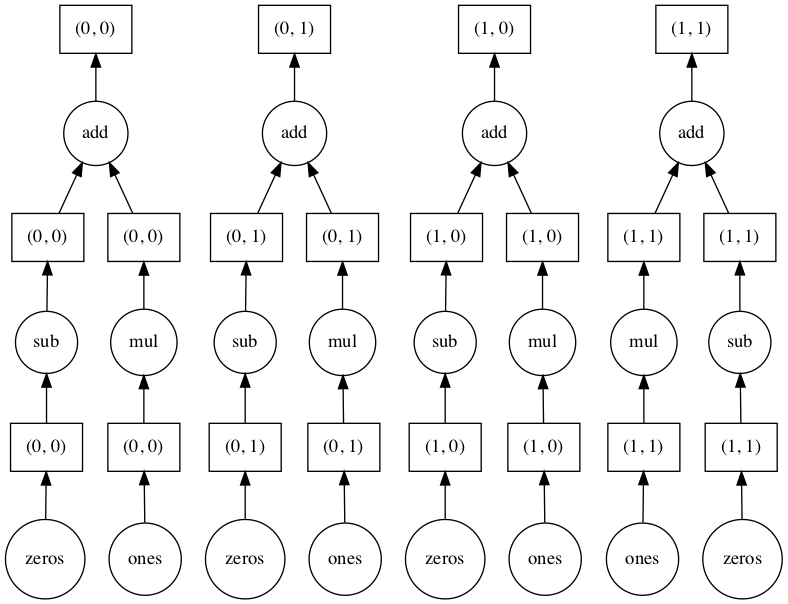

In [33]:
image_4 = (image_1-10) + (image_2*50)
dot_graph(image_4.dask)

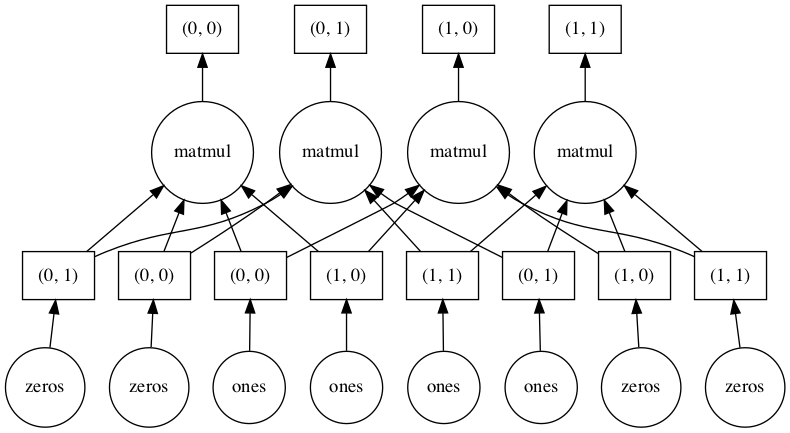

In [34]:
image_5 = da.matmul(image_1, image_2)
dot_graph(image_5.dask)

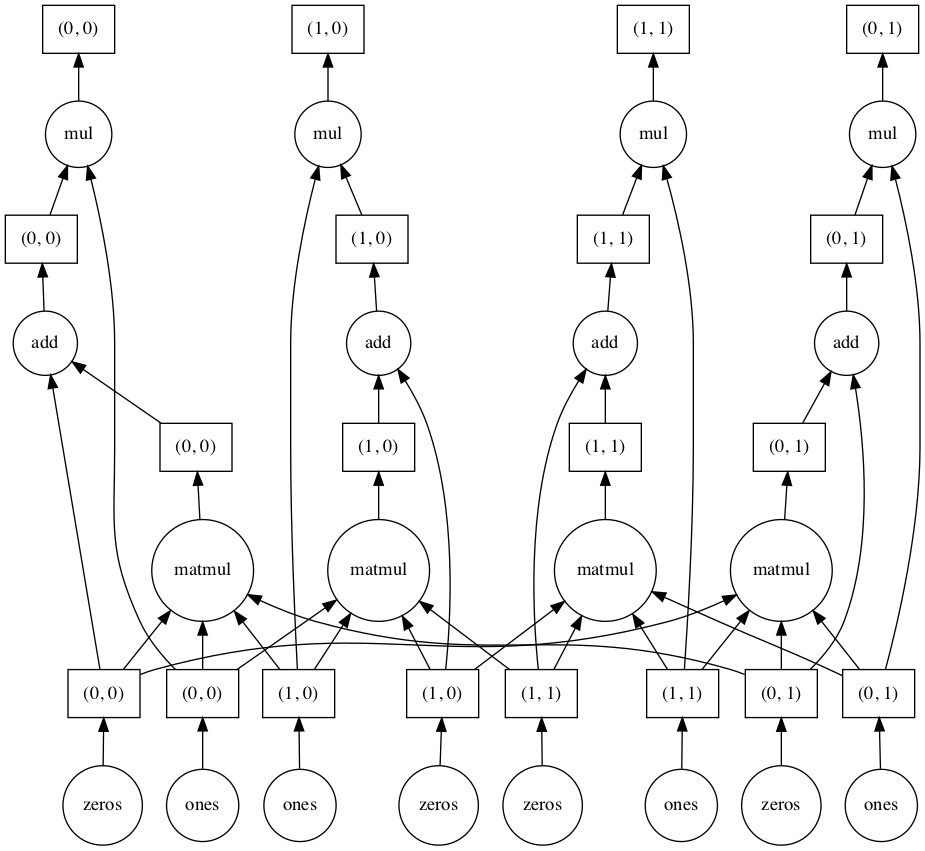

In [35]:
image_6 = (da.matmul(image_1, image_2)+image_1)*image_2
dot_graph(image_6.dask)

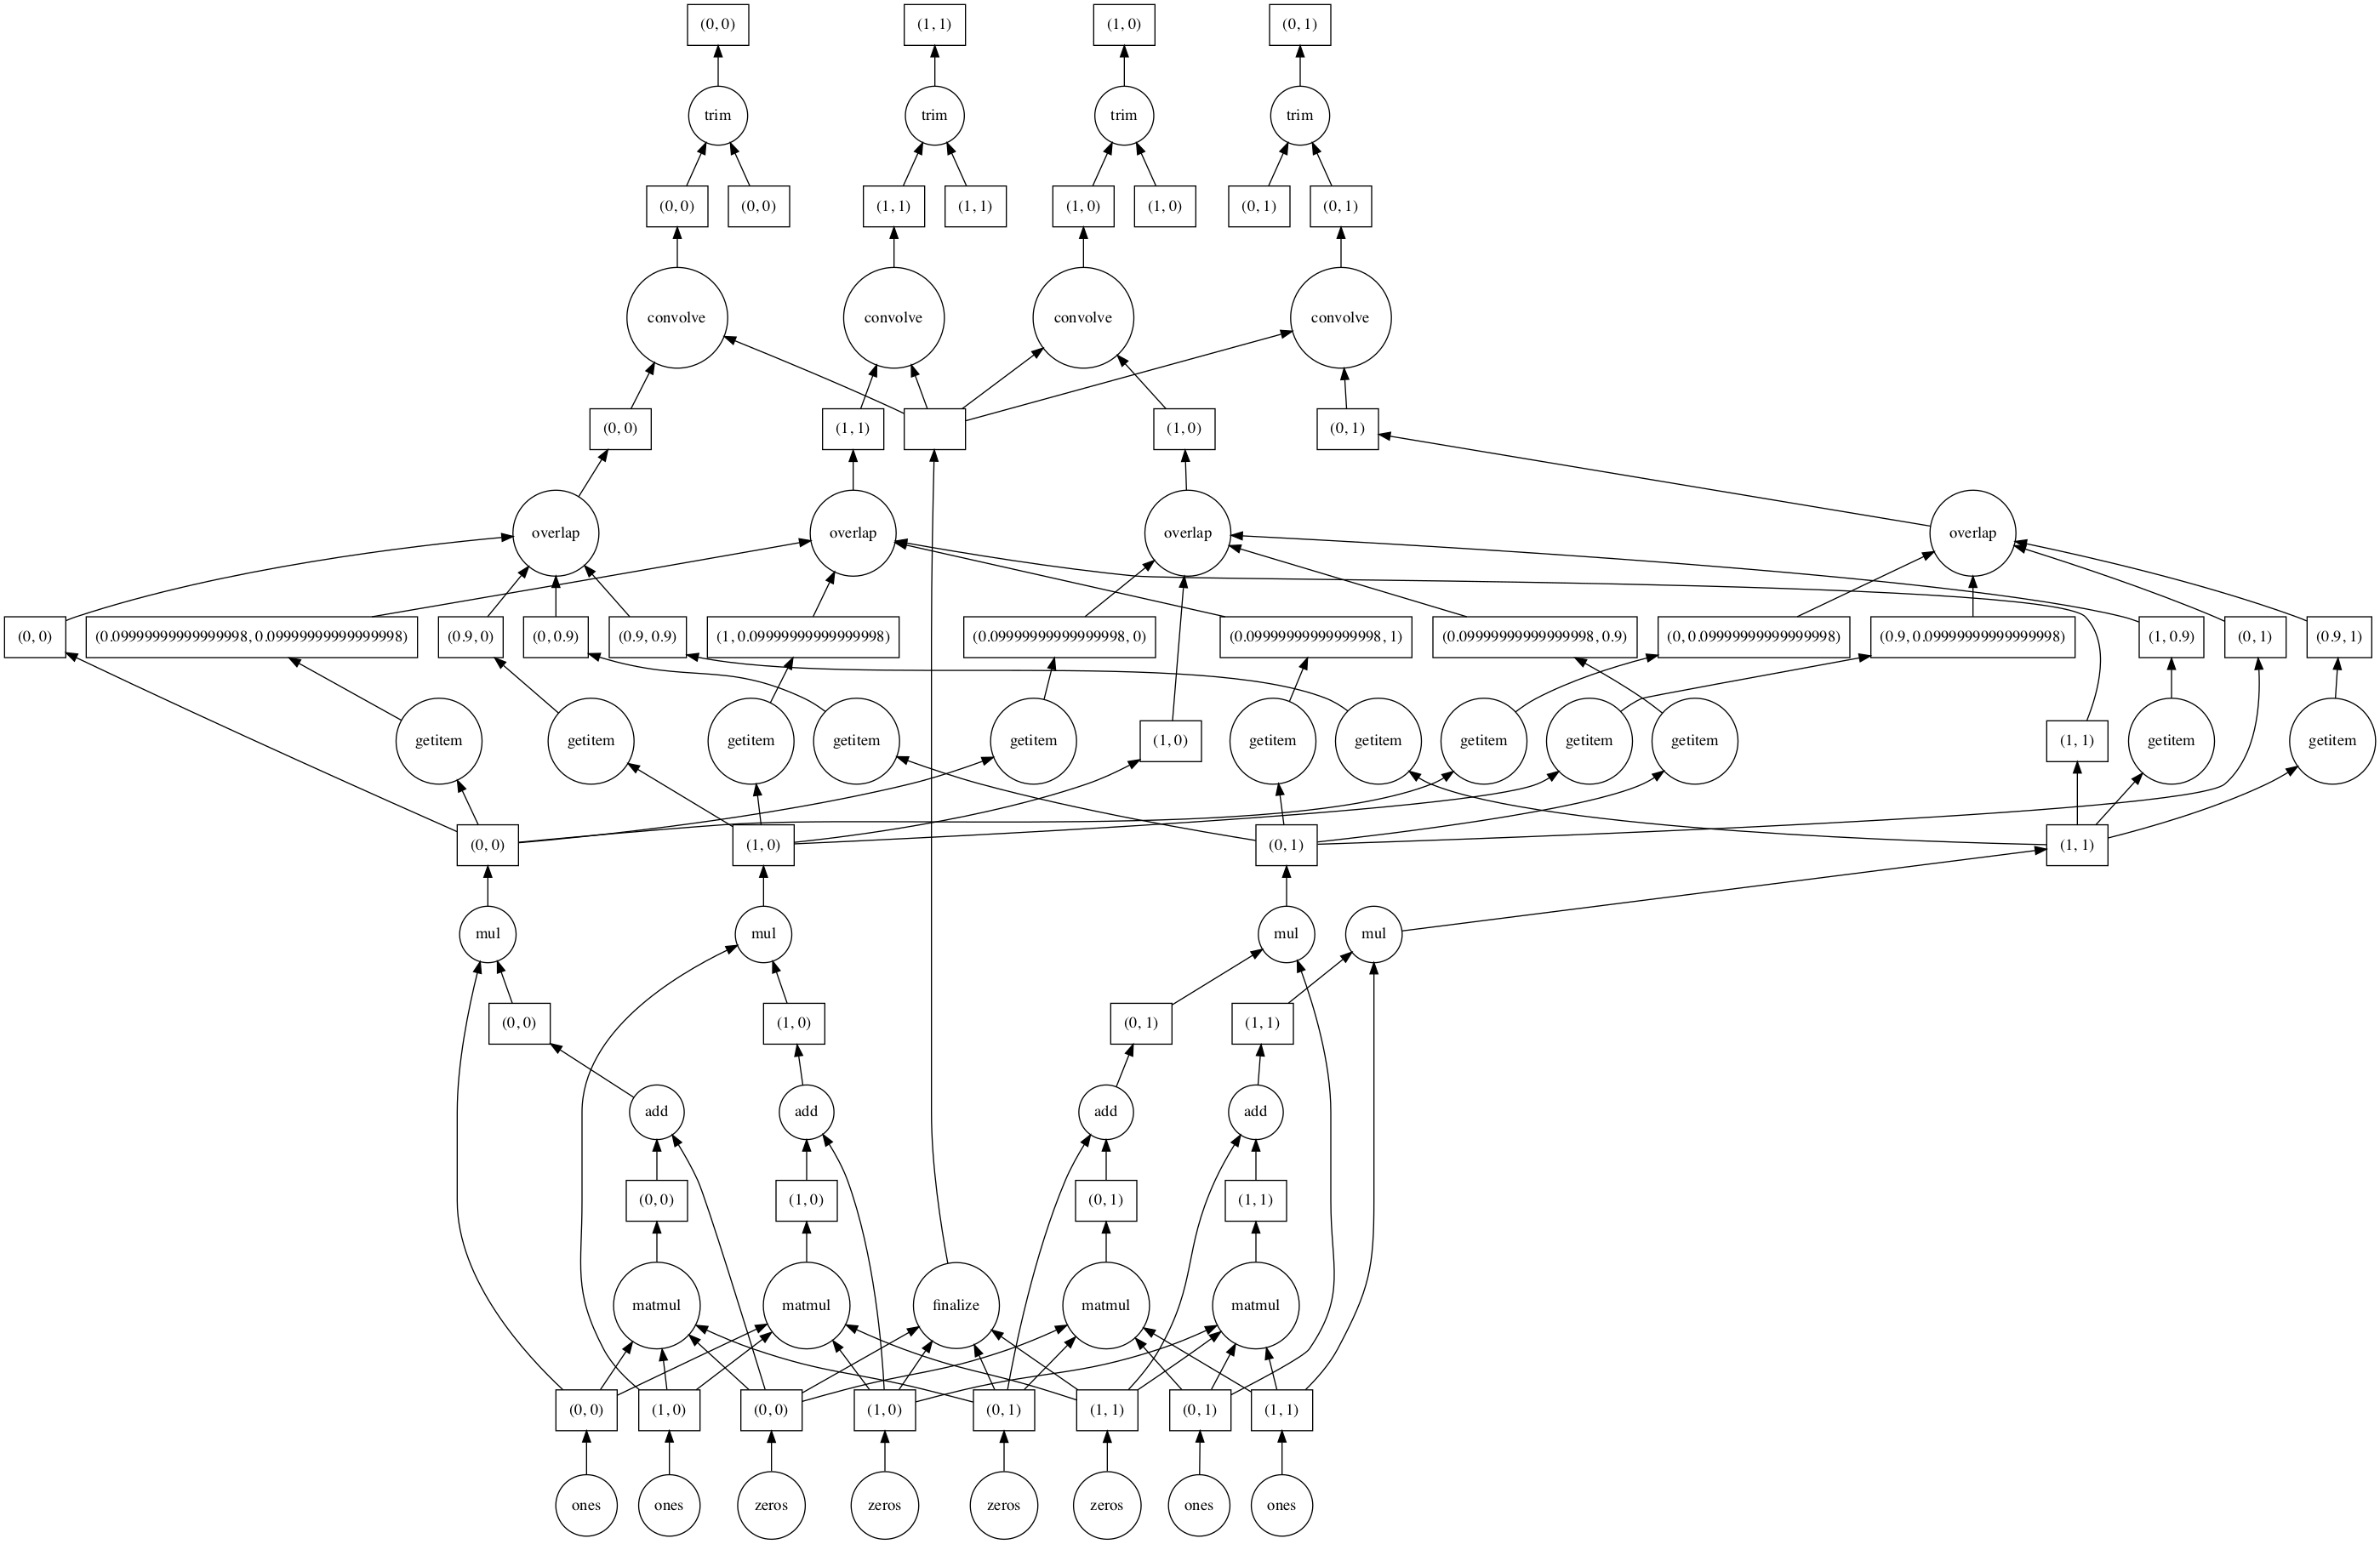

In [36]:
import dask_ndfilters as da_ndfilt
image_7 = da_ndfilt.convolve(image_6, image_1)
dot_graph(image_7.dask)


## Deep Learning
We won't talk too much about deep learning now, but it certainly shows why DAGs are so important. 

The steps above are simple toys compared to what tools are already in use for machine learning

https://keras.io/api/utils/model_plotting_utils/

# Summary

In this lecture we saw that:
- Images revieal information about different samples
- Images are a signals that needs to be quantitatively analyzed
- Science with images is a non-trivial task
- Proper workflows are required for efficient analysis repeatable analysis.